In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [79]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,distinct

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
#View table details
session.query(Measurement).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb9768f3ee0>,
 'id': 1,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08}

In [12]:
session.query(Station).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb976d2b190>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_prior = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_prior

datetime.date(2016, 8, 23)

In [45]:
# Perform a query to retrieve the date and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
date_prec = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_prior).all()
date_prec_df = pd.DataFrame(date_prec)
date_prec_df = date_prec_df.sort_values(['date'])
date_prec_df.head(2230)

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


In [56]:
dates = date_prec_df['date']
total_dates = len(dates)
print(total_dates)
len(dates.unique())

2230


366

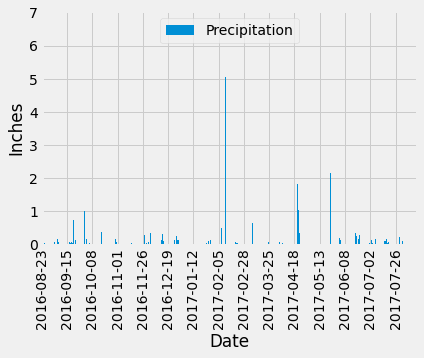

In [74]:
# Use Pandas Plotting with Matplotlib to plot the data
date_prec_df.plot('date','prcp',kind = "bar",figsize=(6,4), label = "Precipitation")
plt.xticks(np.arange(0,total_dates,150),rotation=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [78]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Summary_Stats = date_prec_df['prcp'].describe()
Summary_Stats

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [ ]:
# Exploratory Station Analysis


In [85]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(distinct(Station.station))).all()
total_stations

[(9)]

In [93]:
# Design a query to find the most active stations (i.e. what stations have the most rows)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).all()
active_stations_df = pd.DataFrame(active_stations)
active_stations_df()

ValueError: 1 columns passed, passed data had 2 columns

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()